In [1]:

%pylab inline

matplotlib.rcParams.update({'font.size': 25,'legend.fontsize':25})#'font.family': 'serif'})
#print(plt.style.available)
#style.use('dark_background')
from tqdm import tqdm
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator
rc('axes', linewidth=3)


Populating the interactive namespace from numpy and matplotlib


In [2]:
def smooth(x,window_len=10,window='hanning'):
    import numpy
    """smooth the data using a window with requested size.

    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.

    input:
        x: the input signal
        window_len: the dimension of the smoothing window
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal

    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)

    see also:

    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter

    TODO: the window parameter could be the window itself if an array instead of a string
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[2*x[0]-x[window_len:1:-1],x,2*x[-1]-x[-1:-window_len:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='same')
    return y[window_len-1:-window_len+1]


In [3]:
from tools import read_density
pylab.rcParams['figure.figsize'] = (22.0, 10.0)
matplotlib.rcParams.update({'font.size': 25,'legend.fontsize':25})#,'font.family': 'serif'})

In [4]:
nx = 500
ny = 500
x = linspace(0.01, 3.0,nx)
y = linspace(0.0,5.5,ny)
#plt.figure(3,figsize = (10,5))
delta_s = 30.0
flow_depth = linspace(0.5,10,nx)
fac1 = 0.9
fac2 = fac1
fac3 = delta_s / pi


In [5]:
#dens1, dens1 = read_density(x,y)

In [6]:
def uz(z):
    tt=z/z_0
    if tt<1.0:tt=1.0
    default=us/0.41*log(tt)
    #default=ub*(eta-z_0)*log(z/z_0)*(z_0-eta+eta*log(eta/z_0))**(-1.0)
    return abs(default)

def usstarcr(dg):
    uscr=0.0000001
    nu=1.0004E-6
    gra=9.81
    rho=1000.0
    rhos=2650.
    gamma=gra*(rhos-rho)
    for i in range(50):
        #print locx, locy
        xr=uscr*dg/nu
        yr=0.15*xr**(-1.0)+0.05*exp(-8.0*xr**(-0.9))
        uscr=sqrt(dg*gamma*yr/rho)
    return uscr


def find_ub(uss,etaa,z_00):
    k=0.41
    return uss/k*(z_00-etaa+etaa*log(etaa/z_00))/(etaa-z_00)



In [7]:
gdia=1.0e-3
z_0=gdia/15.
us = usstarcr(gdia)
l_x = linspace(x[0]*delta_s/pi,x[-1]*delta_s/pi,50000)
l_y = linspace(y[0],y[-1],50000)
uu = zeros(len(l_x))
froude = zeros(len(l_x))

for i in range(len(l_x)):
    uu[i] = find_ub(us,l_x[i],z_0)
froude[:] =  uu[:]/sqrt(9.81*l_y[:])
#print(uu)

/home/weiszr/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in divide
  # This is added back by InteractiveShellApp.init_path()


In [134]:
def from_data(x_i1,x_i2,arr1,arr2,y_offset):
    nx = len(arr1)
    for i in range(nx):
        if arr1[i] >= x_i1:
            start_index = i
            break
    for i in range(nx):
        if arr1[i] >= x_i2:
            end_index = i
            break
    factor = linspace(2.5,5.0,(end_index - start_index))
    #print(start_index,end_index)
    newx = arr1[start_index:end_index]
    newy = arr2[start_index:end_index]-(y_offset*factor[:])
    return newx,newy
def scen1(x1,x2,x3,x4,x5,y1,y2,y3,y4,y5):
    xx = [x1,x2,x3,x4,x5]
    yy = [y1,y2,y3,y4,y5]
    print(xx)
    print(yy)
    newx= linspace(xx[-1],xx[0],1000)
    newy = numpy.interp(newx,xx,yy)
    #print(newx)
    #print(newy)
    return newx,newy

def resample(new_x, old_x,old_y):
    return interp(new_x,old_x,old_y)

def compute_lines(lx,xx,ds,f1,f2):
    dline1 = resample(lx, xx * ds/pi,sqrt(tanh(xx)/xx))
    dline2 = resample(lx, xx * ds/pi,sqrt(1/xx))
    dline3 = resample(lx, xx * ds/pi,(sqrt(f1 * xx * tanh(f2 * xx))**(-1.0)-0.04))
    return dline1,dline2,dline3

def make_outputfile(deci=0,tt='test'):
    if deci == 1:
        fname_eps = 'Fig_{t1}.eps'.format(t1=tt)
        fname_png = 'Fig_{t1}.png'.format(t1=tt)
        fname_pdf = 'Fig_{t1}.pdf'.format(t1=tt)
        fig.savefig(fname_eps,bbox_inches='tight', transparent=True)
        fig.savefig(fname_png,dpi=500,bbox_inches='tight', transparent=True)
        fig.savefig(fname_pdf,dpi=500,bbox_inches='tight', transparent=True)
        print("Files '{t1}', '{t3}' and '{t2}' created".format(t1=fname_eps,t2=fname_png,t3=fname_pdf))
    elif deci == 0:
        print("No figure files will be created")

def plotting(ax,xx,lx,fr,line1,line2,line3,d_s):
    ax.plot(lx,line3,'k-')
    ax.fill_between(lx,line3,10,facecolor=(0.9,0.9,0.9))
    ax.plot(lx,line2,'k-')
    ax.fill_between(lx,line2,line3,facecolor='lightcoral')
    ax.plot(lx,line1,'k-')
    ax.fill_between(lx,line1,line2,where=line1>=fr,facecolor=(0.6,0.6,0.6))
    ax.fill_between(lx,fr,line2,where=fr>=line1,facecolor=(0.6,0.6,0.6))
    ax.plot(lx,fr,'k-')
    ax.fill_between(lx,fr,line1,where=fr<=line1,facecolor='skyblue')
    ax.fill_between(lx,0.0,fr,facecolor=(0.4,0.4,0.4))
    #ax.plot(lx,line2,'k-')

    
def make_outputfile(fig,tt='test',res=200):
    fname_eps = 'Fig_{t1}.eps'.format(t1=tt)
    fname_png = 'Fig_{t1}.png'.format(t1=tt)
    fname_pdf = 'Fig_{t1}.pdf'.format(t1=tt)
    fname_svg = 'Fig_{t1}.svg'.format(t1=tt)
    fig.savefig(fname_eps,bbox_inches='tight', transparent=True)
    fig.savefig(fname_png,dpi=res,bbox_inches='tight', transparent=True)
    fig.savefig(fname_pdf,dpi=res,bbox_inches='tight', transparent=True)
    fig.savefig(fname_svg,dpi=res,bbox_inches='tight', transparent=True)
    print("Files '{t1}', '{t3}', '{t2} and {t5}' created, where the latter two have dpi={t4}".format(t1=fname_eps,t2=fname_png,t3=fname_pdf,t5=fname_svg,t4=str(res)))
    
    

7
[0.0, 0.1, 3.0, 7.0, 15.0]
[0.0, 4.3, 2.6, 1.2, 0.83]
1000


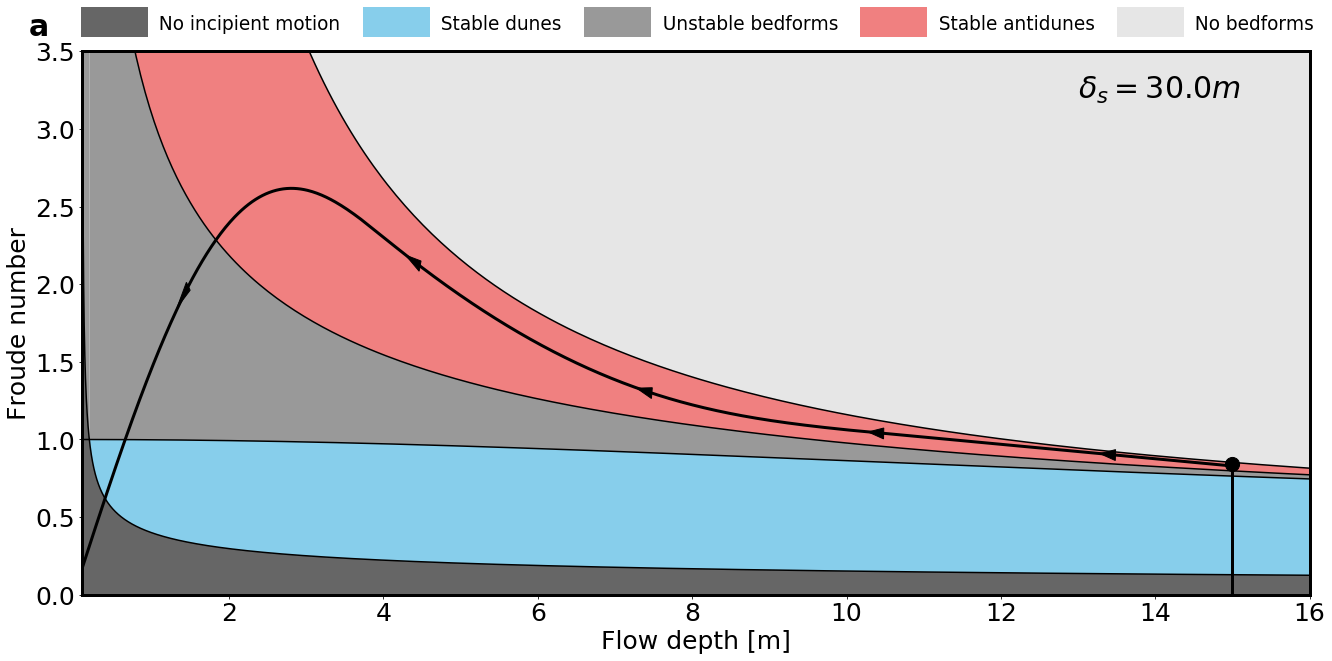

In [133]:
delta_s1 = 30.0
delta_s2 = 20.0
delta_s3 = 11.0
line1_s1,line2_s1,line3_s1 = compute_lines(l_x,x,delta_s1,fac1,fac2)
line1_s2,line2_s2,line3_s2 = compute_lines(l_x,x,delta_s2,fac1,fac2)
line1_s3,line2_s3,line3_s3 = compute_lines(l_x,x,delta_s3,fac1,fac2)
font0 = FontProperties()
font = font0.copy()
font.set_weight('bold')
#s1_x,s1_y = from_data(15.0,0.84,x*delta_s/pi,(sqrt(fac1*x* tanh(fac2*x))**(-1.0)-0.04),0.1)
#ss1_y = smooth(s1_y)
# arrow_s1_x = []
# arrow_s1_y = []
# arrow_s1_dx = []
# arrow_s1_dy = []
# for i in range(10,150,20):
#     arrow_s1_x.append(s1_x[i])
#     arrow_s1_y.append(s1_y[i])
#     arrow_s1_dx.append(s1_x[i-1]-s1_x[i])
#     arrow_s1_dy.append(s1_y[i-1]-s1_y[i])
print(len(arrow_s1_x))
s2_x,s2_y = scen1(0.0,0.1,3.0,7.0,15.,0.0,4.3,2.6,1.2,0.83)
arrow_s2_x = []
arrow_s2_y = []
arrow_s2_dx = []
arrow_s2_dy = []
ss2_y = smooth(s2_y,550)
print(len(s2_y))
for i in range(100,1000,200):
    arrow_s2_x.append(s2_x[i])
    arrow_s2_y.append(ss2_y[i])
    arrow_s2_dx.append(s2_x[i]-s2_x[i-1])
    arrow_s2_dy.append(ss2_y[i]-ss2_y[i-1])





#fig,(ax1,ax2,ax3) = subplots(nrows=3,ncols=1,figsize=(22,30))
fig,ax1 = subplots(nrows=1,ncols=1,figsize=(22,10))

plotting(ax1,x,l_x,froude,line1_s1,line2_s1,line3_s1,delta_s1)
ax1.plot([],[],color=(0.4,0.4,0.4),lw =30,label='  No incipient motion')
ax1.plot([],[],color='skyblue',lw =30,label='  Stable dunes')
ax1.plot([],[],color=(0.6,0.6,0.6),lw =30,label='  Unstable bedforms')
ax1.plot([],[],color='lightcoral',lw =30,label='  Stable antidunes')
ax1.plot([],[],color=(0.9,0.9,0.9),lw =30,label='  No bedforms')
ax1.legend(fontsize=18.5,loc=(0.005, 1.02),ncol=5,frameon = False)
ax1.text(13.,3.2,'$\delta_s = {t1} m$'.format(t1=delta_s1),size =30)
ax1.set_ylim(0.,3.5);
ax1.set_xlim(x[0]*delta_s1/pi,16);
ax1.set_ylabel('Froude number');
ax1.set_xlabel('Flow depth [m]');
v_line_x = [15.,15.]
v_line_y = [0.0,0.84]
ax1.plot(s2_x,ss2_y,'k-',lw=3)
ax1.plot(arrow_s2_dx,arrow_s2_dy)
ax1.plot(arrow_s3_dx,arrow_s3_dy)
ax1.plot(arrow_s4_dx,arrow_s4_dy)
ax1.plot(v_line_x,v_line_y,'k-',lw=3)
ax1.scatter(v_line_x[1],v_line_y[1],s=200,color='k')
for i in range(len(arrow_s2_x)):
    ax1.arrow( arrow_s2_x[i], arrow_s2_y[i], arrow_s2_dx[i], arrow_s2_dy[i], fc="k", ec="k", head_width=0.07, head_length=0.2 )


ax1.text(-0.6,3.6,'a',size=30,fontproperties=font);


# plotting(ax2,x,l_x,froude,line1_s2,line2_s2,line3_s2,delta_s2)
# ax2.text(13.,5.2,'$\delta_s = {t1} m$'.format(t1=delta_s2),size =30)
# ax2.set_ylim(0.,5.5);
# ax2.set_xlim(x[0]*delta_s2/pi,15);
# ax2.set_ylabel('Froude number');
# ax2.text(-0.6,5.4,'b',size=30,fontproperties=font);


# plotting(ax3,x,l_x,froude,line1_s3,line2_s3,line3_s3,delta_s3)
# ax3.text(13.,5.2,'$\delta_s = {t1} m$'.format(t1=delta_s3),size =30)
# ax3.set_ylim(0.,5.5);
# ax3.set_xlim(x[0]*delta_s3/pi,15);
# ax3.set_xlabel('Flow depth [m]');
# ax3.set_ylabel('Froude number');
# ax3.text(-0.6,5.4,'c',size=30,fontproperties=font);

#make_outputfile(1,'erosion_length')


In [136]:
make_outputfile(fig,tt='antidune',res=200)

Files 'Fig_antidune.eps', 'Fig_antidune.pdf', 'Fig_antidune.png and Fig_antidune.svg' created, where the latter two have dpi=200


# Notes

In a discussion with Charlie, Adam and Chris, we said that the first figure assumes a constant erosion length. However, during the anitdunes evolution, the erosion length changes. The change in erosion length could be the third dimnesion. There are two ways forward:

- extract a certein Froude number range and dertermine the flow depth as a function of erosion length
- Try to convert the three-dimensional path into a ternary diagram

In [10]:
def find_flow_depth_fr(arr, fl_arr, fr_value):
    #print(fr_value)
    for i in range(len(arr)):
        if arr[i] <= fr_value:
            fr_index = i
            break
    return fl_arr[fr_index]

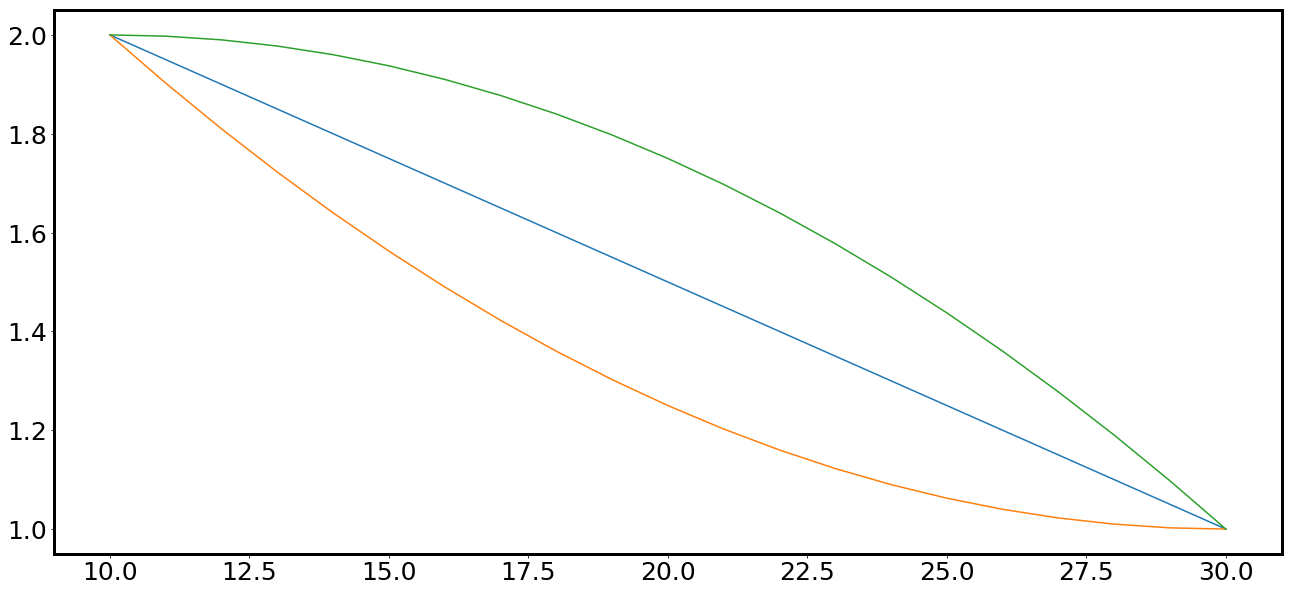

In [11]:
ds_array = linspace(10,30,21)
fr_c1 = linspace(2.0, 1.0,21)
fr_c2 = zeros(21)
fr_c3 = zeros(21)
for i in range(21):
    fr_c2[i] = 1.0/(20**2.0)*(ds_array[i] - 30.0)**2.0 + 1.0
    fr_c3[i] = -1.0/(20**2.0)*(ds_array[i] - 10.0)**2.0 + 2.0

plot(ds_array,fr_c1)
plot(ds_array,fr_c2)
plot(ds_array,fr_c3)
#1 = a*(30 - 10)**2.0 + 2
#print(1./(-20**2.0))

50000
Files 'Fig_combined.eps', 'Fig_combined.pdf' and 'Fig_combined.png' created


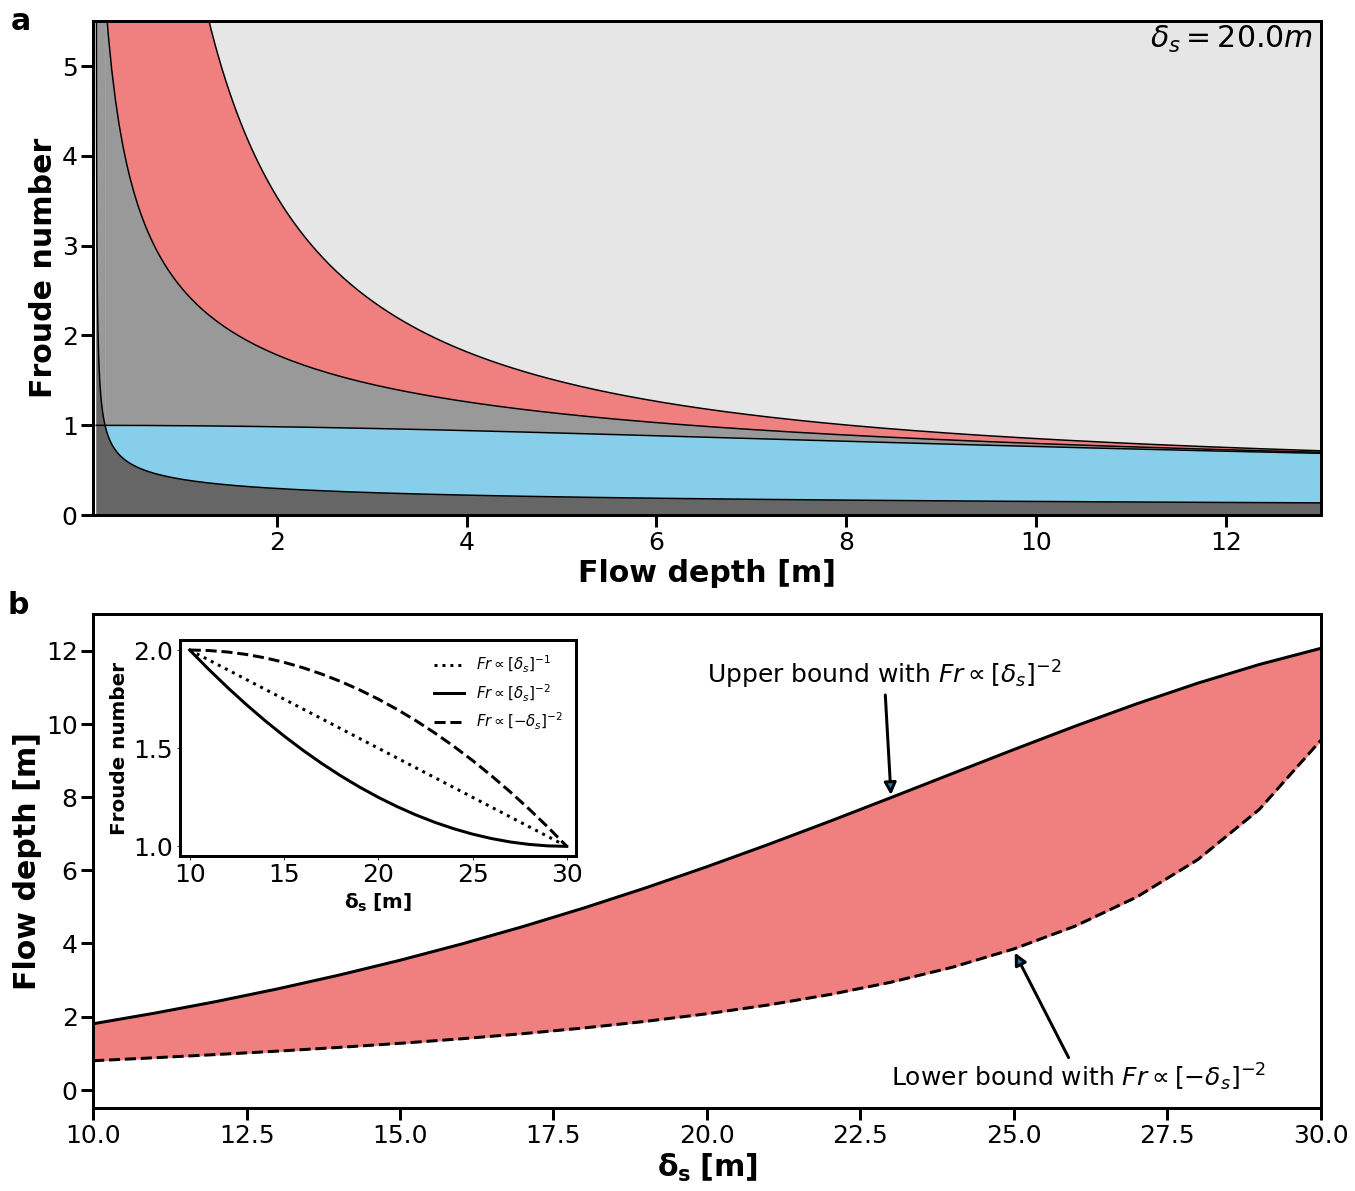

In [12]:
dummy,line2_s1,line3_s1 = compute_lines(l_x,x,delta_s1,fac1,fac2)
dummy,line2_s2,line3_s2 = compute_lines(l_x,x,delta_s2,fac1,fac2)
dummy,line2_s3,line3_s3 = compute_lines(l_x,x,delta_s3,fac1,fac2)
print(len(l_x))
upper_fr_fl1 = zeros(len(ds_array))
lower_fr_fl1 = zeros(len(ds_array))
upper_fr_fl2 = zeros(len(ds_array))
lower_fr_fl2 = zeros(len(ds_array))
ufr_change1 = zeros(len(ds_array))
lfr_change1 = zeros(len(ds_array))
ufr_change2 = zeros(len(ds_array))
lfr_change2 = zeros(len(ds_array))
ufr_change3 = zeros(len(ds_array))
lfr_change3 = zeros(len(ds_array))



upper_fr_lines = zeros([len(ds_array),len(l_x)])
for i_ds in range(len(ds_array)):
    #print(ds_array[i_ds],fr_c[i_ds])
    dummy1,i_dummy2,i_dummy1 =  compute_lines(l_x,x,ds_array[i_ds],fac1,fac2)
    upper_fr_fl1[i_ds] = find_flow_depth_fr(i_dummy1,l_x,1.00)
    lower_fr_fl1[i_ds] = find_flow_depth_fr(i_dummy2,l_x,1.00)
    upper_fr_fl2[i_ds] = find_flow_depth_fr(i_dummy1,l_x,2.0)
    lower_fr_fl2[i_ds] = find_flow_depth_fr(i_dummy2,l_x,2.0)
    ufr_change1[i_ds]= find_flow_depth_fr(i_dummy1,l_x,fr_c1[i_ds])
    lfr_change1[i_ds]= find_flow_depth_fr(i_dummy2,l_x,fr_c1[i_ds])
    ufr_change2[i_ds]= find_flow_depth_fr(i_dummy1,l_x,fr_c2[i_ds])
    lfr_change2[i_ds]= find_flow_depth_fr(i_dummy2,l_x,fr_c2[i_ds])
    ufr_change3[i_ds]= find_flow_depth_fr(i_dummy1,l_x,fr_c3[i_ds])
    lfr_change3[i_ds]= find_flow_depth_fr(i_dummy2,l_x,fr_c3[i_ds])
    
font0 = FontProperties()
font = font0.copy()
font.set_weight('bold')

fig,(ax0,ax1) = subplots(nrows=2,ncols=1,figsize=(22,20))
ax0.tick_params(which='both', width=3)
ax0.tick_params(which='major', length=12)

plotting(ax0,x,l_x,froude,line1_s2,line2_s2,line3_s2,delta_s2)
ax0.text(11.2,5.2,'$\delta_s = {t1} m$'.format(t1=delta_s2),size =30)
ax0.set_ylim(0.,5.5);
ax0.set_xlim(x[0]*delta_s2/pi,13);
ax0.set_ylabel('Froude number', size=30,fontproperties=font);
ax0.set_xlabel('Flow depth [m]', size=30,fontproperties=font);

ax0.text(-0.8,5.4,'a',size=30,fontproperties=font);



ax1.tick_params(which='both', width=3)
ax1.tick_params(which='major', length=12)
ax1.plot(ds_array,ufr_change2,color = 'k',linestyle='-',lw=3, label='Upper bound of stability field')
ax1.fill_between(ds_array,ufr_change2,lfr_change3, color='lightcoral')
ax1.plot(ds_array,lfr_change3,color = 'k',linestyle='--',lw=3, label='Lower bound of stability field')
ax1.plot([],[],lw =10,color='lightcoral', label='$Fr = const.$')
ax1.plot([],[],lw =10,color='skyblue', label='$Fr \propto [\delta_s]^{-1}$')
ax1.set_xlim(10,30)
ax1.set_ylim(-0.5,13)
ax1.text(8.6,13,'b',size=30,fontproperties=font);

ax1.set_xlabel('$\mathbf{\delta_s}\; \mathbf{[m]}$',size=30,fontproperties=font)
ax1.set_ylabel('Flow depth [m]', size=30,fontproperties=font)
ax1.annotate("Lower bound with $Fr \propto [-\delta_s]^{-2}$",
            xy=(25,3.8), xycoords='data',
            xytext=(23, 0.1), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",linewidth=3,
                            connectionstyle="arc3"), 
            )
ax1.annotate("Upper bound with $Fr \propto [\delta_s]^{-2}$",
            xy=(23,8), xycoords='data',
            xytext=(20, 11.1), textcoords='data',
            arrowprops=dict(arrowstyle="-|>",linewidth=3,
                            connectionstyle="arc3"), 
            )


ax1_inset = fig.add_axes([0.18, 0.3, 0.25, 0.15]) # inset axes
ax1_inset.plot(ds_array,fr_c1,color = 'k',linestyle=':',lw=3, label='$Fr \propto [\delta_s]^{-1}$')
ax1_inset.plot(ds_array,fr_c2,color = 'k',linestyle='-',lw=3, label='$Fr \propto [\delta_s]^{-2}$')
ax1_inset.plot(ds_array,fr_c3,color = 'k',linestyle='--',lw=3, label='$Fr \propto [-\delta_s]^{-2}$')
ax1_inset.set_xlabel('$\mathbf{\delta_s}\; \mathbf{[m]}$',size=20)
ax1_inset.set_ylabel('Froude number', size=20,fontproperties=font)
ax1_inset.legend(frameon=False,fontsize=15)
ax1_inset.set_xlim(9.5,30.5)
ax1_inset.set_ylim(0.95,2.05)
make_outputfile(1,'combined')


In [13]:
dummy,line2_s1,line3_s1 = compute_lines(l_x,x,delta_s1,fac1,fac2)
dummy,line2_s2,line3_s2 = compute_lines(l_x,x,delta_s2,fac1,fac2)
dummy,line2_s3,line3_s3 = compute_lines(l_x,x,delta_s3,fac1,fac2)
print(len(l_x))
upper_fr_fl1 = zeros(len(ds_array))
lower_fr_fl1 = zeros(len(ds_array))
upper_fr_fl2 = zeros(len(ds_array))
lower_fr_fl2 = zeros(len(ds_array))
fr_change1 = zeros(len(ds_array))
fr_change2 = zeros(len(ds_array))

upper_fr_lines = zeros([len(ds_array),len(l_x)])
for i_ds in range(len(ds_array)):
    #print(ds_array[i_ds],fr_c[i_ds])
    dummy1,i_dummy2,i_dummy1 =  compute_lines(l_x,x,ds_array[i_ds],fac1,fac2)
    upper_fr_fl1[i_ds] = find_flow_depth_fr(i_dummy1,l_x,1.00)
    lower_fr_fl1[i_ds] = find_flow_depth_fr(i_dummy2,l_x,1.00)
    upper_fr_fl2[i_ds] = find_flow_depth_fr(i_dummy1,l_x,2.0)
    lower_fr_fl2[i_ds] = find_flow_depth_fr(i_dummy2,l_x,2.0)
    fr_change1[i_ds]= find_flow_depth_fr(i_dummy1,l_x,fr_c[i_ds])
    fr_change2[i_ds]= find_flow_depth_fr(i_dummy2,l_x,fr_c[i_ds])
    
font0 = FontProperties()
font = font0.copy()
font.set_weight('bold')

fig,ax1 = subplots(nrows=1,ncols=1,figsize=(22,10))
ax1.tick_params(which='both', width=3)
ax1.tick_params(which='major', length=12)
ax1.set_title('Upper and lower bound of antidune field',size=35,fontproperties=font)
print(shape(upper_fr_fl))
ax1.fill_between(ds_array,lower_fr_fl2,upper_fr_fl1,color='lightcoral')
ax1.plot(ds_array,lower_fr_fl2,color = 'k',linestyle='--',lw=3)
#ax1.plot(ds_array,upper_fr_fl2,color = 'k',linestyle='--',lw=3)

ax1.text(15,0.8,'Froude = 2.0',rotation =2.3)

ax1.plot(ds_array,upper_fr_fl1,'k-',lw=3)
ax1.text(15,7.4,'Froude = 1.0',rotation =14)
ax1.plot(ds_array,fr_change1,color = 'k',linestyle='-',lw=3, label='Upper bound of stability field')
ax1.plot(ds_array,fr_change2,color = 'k',linestyle='--',lw=3, label='Lower bound of stability field')
ax1.fill_between(ds_array,fr_change1,fr_change2, color='skyblue')
#ax1.text(10.1,2.3,'Upper bound of stability field',rotation=8)
ax1.plot([],[],lw =10,color='lightcoral', label='$Fr = const.$')
ax1.plot([],[],lw =10,color='skyblue', label='$Fr \propto [\delta_s]^{-1}$')
ax1.legend(frameon=False)
ax1.set_xlim(10,30)
ax1.set_ylim(-0.5,13)

ax1.set_xlabel('$\mathbf{\delta_s}\; \mathbf{[m]}$',size=30,fontproperties=font)
ax1.set_ylabel('Flow depth [m]', size=30,fontproperties=font)
print(shape(line2_s1))
# xlim(0,14)
# ylim(0,5.5)
#make_outputfile(1,'varying_elength')


50000


NameError: name 'fr_c' is not defined

In [14]:
###Different paths

s1_x,s1_y = from_data(8.0,17.0,x*delta_s/pi,(sqrt(fac1*x* tanh(fac2*x))**(-1.0)-0.04),0.1)
#ss1_y = smooth(s1_y)
arrow_s1_x = []
arrow_s1_y = []
arrow_s1_dx = []
arrow_s1_dy = []
for i in range(10,50,20):
    arrow_s1_x.append(s1_x[i])
    arrow_s1_y.append(s1_y[i])
    arrow_s1_dx.append(s1_x[i-1]-s1_x[i])
    arrow_s1_dy.append(s1_y[i-1]-s1_y[i])

s2_x,s2_y = scen1(x[0],2.0,4.5,s1_x[0],0.0,1.3,1.3,s1_y[0])
arrow_s2_x = []
arrow_s2_y = []
arrow_s2_dx = []
arrow_s2_dy = []
ss2_y = smooth(s2_y,250)
for i in range(250,500,160):
    arrow_s2_x.append(s2_x[i])
    arrow_s2_y.append(ss2_y[i])
    arrow_s2_dx.append(s2_x[i]-s2_x[i-1])
    arrow_s2_dy.append(ss2_y[i]-ss2_y[i-1])


s3_x,s3_y = scen1(x[0],2.0,6.5,s1_x[0],0.0,0.2,0.2,s1_y[0])
arrow_s3_x = []
arrow_s3_y = []
arrow_s3_dx = []
arrow_s3_dy = []
ss3_y = smooth(s3_y,250)
for i in range(100,500,250):
    arrow_s3_x.append(s3_x[i])
    arrow_s3_y.append(ss3_y[i])
    arrow_s3_dx.append(s3_x[i]-s3_x[i-1])
    arrow_s3_dy.append(ss3_y[i]-ss3_y[i-1])



s4_x,s4_y = scen1(x[0],5.9,7.0,s1_x[0],0.0,5.9,4.0,s1_y[0])
arrow_s4_x = []
arrow_s4_y = []
arrow_s4_dx = []
arrow_s4_dy = []
ss4_y = smooth(s4_y,250)
for i in range(200,500,150):
    arrow_s4_x.append(s4_x[i])
    arrow_s4_y.append(ss4_y[i])
    arrow_s4_dx.append(s4_x[i]-s4_x[i-1])
    arrow_s4_dy.append(ss4_y[i]-ss4_y[i-1])

s5_x = zeros(nx)
s5_x[:] = s1_x[-1]
s5_y = linspace(0,s1_y[-1],nx)
arrow_s5_x = []
arrow_s5_y = []
arrow_s5_dx = []
arrow_s5_dy = []
for i in range(50,450,150):
    arrow_s5_x.append(s5_x[i])
    arrow_s5_y.append(s5_y[i])
    arrow_s5_dx.append(s5_x[i]-s5_x[i-1])
    arrow_s5_dy.append(s5_y[i]-s5_y[i-1])



In [15]:
print(froude)

[        inf 11.57660917  8.19359329 ...  0.09872019  0.09871937
  0.09871854]
